# Ejercicio 6.1

El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston. Importamos el dataset a analizar y abrimos las bibliotecas necesarias para trabajar.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
inmob = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")

print(inmob.shape)
print(inmob.head(),'\n')
print(inmob.describe(),'\n')
print(inmob.columns,'\n')

inmob = inmob.dropna()
print(inmob.shape)

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2

[5 rows x 14 columns] 

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  486.000000  486.000000  486.000000  ...  506.000000  486.000000  506.000000
mean     3.611874   11.211934   11.083992  ...  356.674032   12.715432   22.532806
std      8.720192   23.388876    6.835896  ...   91.294864    7.155871    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.081900    0.000000    5.190000  ...  375.377500    7.125000   17.025000
50%  

Separamos el dataset limpio (elliminadas las filas con datos NaN) en subconjuntos de entrenamiento y testeo.

In [40]:
from sklearn.model_selection import train_test_split

inmob_train, inmob_test, target_train, target_test = train_test_split(inmob, inmob['MEDV'], test_size=0.2, random_state=0)

print(inmob_train.shape)
print(inmob_test.shape)
print(target_train.shape)
print(target_test.shape)

(315, 14)
(79, 14)
(315,)
(79,)


Regularizamos los registros del dataset para poder aplicar un análisis de componentes principales (PCA) y así determinar la relevancia de los distintos atributos sobre nuestro atributo target.

In [41]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(inmob_train)

inmob_train_std = stdsc.transform(inmob_train)
inmob_test_std = stdsc.transform(inmob_test)

In [42]:
from sklearn.decomposition import PCA

pca = PCA(random_state=123)
inmob_train_pca = pca.fit_transform(inmob_train_std)

var_exp_pca = pca.explained_variance_ratio_

sum_acum = np.cumsum(var_exp_pca)

Graficamos el resultado para visualizar la variancia individual por atributo y la acumulada.

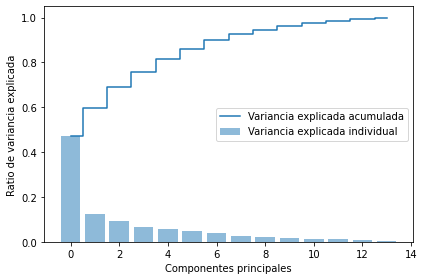

In [43]:
plt.bar(range(0,len(var_exp_pca)), var_exp_pca, alpha=0.5, align='center', label='Variancia explicada individual')
plt.step(range(0,len(sum_acum)), sum_acum, where='mid',label='Variancia explicada acumulada')
plt.ylabel('Ratio de variancia explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Regularizamos los registros del dataset original limpio y graficamos todos los atributos vs target para tratar de identificar cuales podrian tener una relación más fuerte.

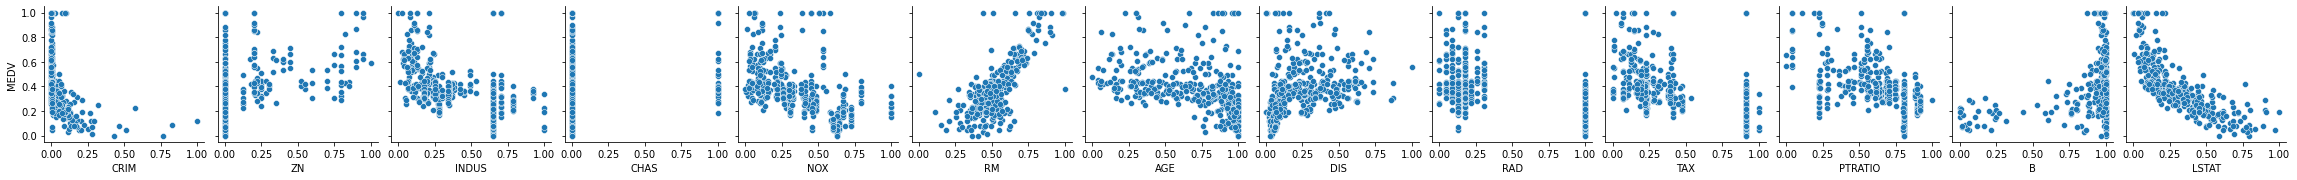

In [44]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
inmob_norm = norm.fit_transform(inmob)

inmob_norm = pd.DataFrame(inmob_norm, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV'])

sns.pairplot(inmob_norm, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] , y_vars='MEDV')

Detección y remosión de outliers sobre las variables de mayor influencia para disminuir el ruido sobre el modelo final.
//NO SE APLICA AL MODELO PORQUE EMPEORA LAS MÉTRICAS FINALES.//

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


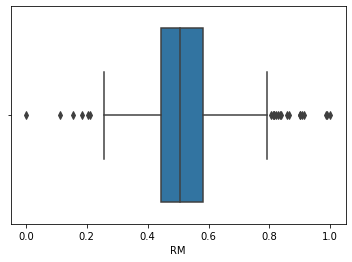

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Filas de outliers por encima: [[ 82  83 131 134 145 155 162 163 177 178 182 197 200 208 219 221 285]]
Filas de outliers por debajo: [[286 292 299 322]]


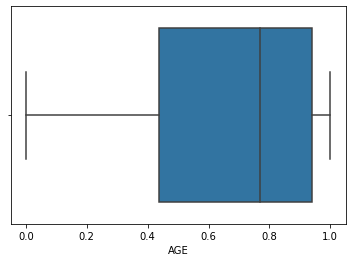

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


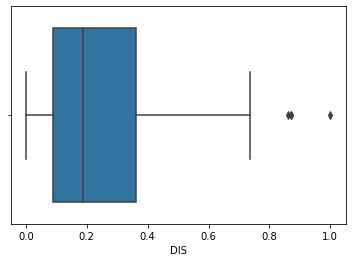

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Filas de outliers por encima: [[274 275 276 277]]


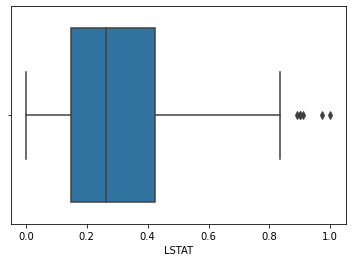

Filas de outliers por encima: [[117 291 292 320 322 341]] 

int64
(31,)


In [32]:
out1 = sns.boxplot(inmob_norm['RM'])
plt.show(out1)

h1 = np.asarray(np.where(inmob_norm['RM']>0.8))
print('Filas de outliers por encima:',h1)
l1 = np.asarray(np.where(inmob_norm['RM']<0.2))
print('Filas de outliers por debajo:', l1)

out2= sns.boxplot(inmob_norm['AGE'])
plt.show(out2)

out3 = sns.boxplot(inmob_norm['DIS'])
plt.show(out3)

h2 = np.asarray(np.where(inmob_norm['DIS']>0.8))
print('Filas de outliers por encima:',h2)

out4 = sns.boxplot(inmob_norm['LSTAT'])
plt.show(out4)

h3 = np.asarray(np.where(inmob_norm['LSTAT']>0.85))
print('Filas de outliers por encima:',h3,'\n')

rows = np.concatenate((h1[0,:], l1[0,:], h2[0,:], h3[0,:]), axis=0)
print(rows.dtype)
print(rows.shape)

In [34]:
inmob_clean = inmob_norm.drop(rows)
print('Luego de la remosión de outliers el tamaño del dataset resultante es:', inmob_clean.shape)

Luego de la remosión de outliers el tamaño del dataset resultante es: (365, 14)


Hacemos una nueva elaboración de subconjuntos de entrenamiento y testeo solo con las variables que presentaron mayor influencia sobre nuestra variable target.

In [45]:
from sklearn.model_selection import train_test_split

inm_train, inm_test, trg_train, trg_test = train_test_split(inmob_norm[['RM','AGE','DIS','LSTAT']], inmob_norm['MEDV'], random_state=0)
print(inm_train.shape)
print(inm_test.shape)
print(trg_train.shape)
print(trg_test.shape)

(295, 4)
(99, 4)
(295,)
(99,)


Aplicamos una regresión multivariada para medir el ceoficiente R2 y poder evaluar distintas métricas sobre el modelo elaborado.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg_lin = LinearRegression()
reg_lin_mod = reg_lin.fit(inm_train,trg_train)

r2 = reg_lin_mod.score(inm_train,trg_train)
print('El coeficiente R2 para esta regresión es:',r2)

trg_pred = reg_lin_mod.predict(inm_test)    #Generado el modelo predecimos resultados posibles de nuestra variable target.

MAE = metrics.mean_absolute_error(trg_test,trg_pred)
print('El error medio absoluto del modelo es:', MAE)

MSE = metrics.mean_squared_error(trg_test,trg_pred)
print('La media de los errores al cuadrado es:', MSE)

RMSE = np.sqrt(MSE)
print('La raíz de la media de los errores al cuadrado es:',RMSE)

El coeficiente R2 para esta regresión es: 0.6918802981587855
El error medio absoluto del modelo es: 0.08363373705282012
La media de los errores al cuadrado es: 0.014865730541500099
La raíz de la media de los errores al cuadrado es: 0.12192510217957621


Graficamos la dispersión entre los valores target de testeo y los target predichos por el modelo.

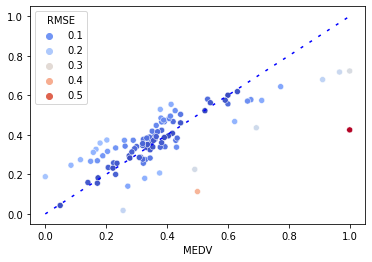

In [47]:
test_pred_df = pd.DataFrame({'trg_test': trg_test, 'trg_pred': trg_pred, 'RMSE':np.sqrt((trg_test-trg_pred)**2)})

sns.scatterplot(x=trg_test, y=trg_pred, palette='coolwarm', hue='RMSE', data=test_pred_df)

X_plot = np.linspace(test_pred_df['trg_test'].min(), test_pred_df['trg_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])